In [1]:
import mdtraj as md
import bpmfwfft.grids as grids
import numpy as np

In [2]:
from os import walk
import socket
if socket.gethostname() == 'jim-Mint':
    ppi_path = '/media/jim/Research_TWO/FFT_PPI'
    home = '/home/jim'
else:
    ppi_path = '/home/jtufts/Desktop/FFT_PPI'
    home = '/home/jtufts'

In [3]:
f = {}
for (dirpath, dirnames, filenames) in walk(f'{ppi_path}/2.redock/2.minimize'):
    if filenames[0] != 'run_me.sh':
        if 'complex.pdb' in filenames:
            f[dirpath.split('/')[7]] = dirpath + '/complex.pdb'

In [29]:
keys = list(f.keys())
keys.sort()
system = keys[126] #36 
system

'2O3B_A:B'

In [30]:
%%time
import netCDF4 as nc
import numpy as np
grid_name = "sasa.nc"
grid_path = f'{ppi_path}/2.redock/4.receptor_grid/{system}'
print(grid_path)
grid_nc = '%s/%s'%(grid_path,grid_name)


#parsing some of the netcdf variables from grid.nc
grid_variables = nc.Dataset(grid_nc, 'r').variables
counts = nc.Dataset(grid_nc, 'r').variables["counts"][:]
x = nc.Dataset(grid_nc, 'r').variables["x"][:]
y = nc.Dataset(grid_nc, 'r').variables["y"][:]
z = nc.Dataset(grid_nc, 'r').variables["z"][:]
# electrostatic = nc.Dataset(grid_nc, 'r').variables["electrostatic"][:]
occupancy = nc.Dataset(grid_nc, 'r').variables["occupancy"][:]
trans_crd = nc.Dataset(grid_nc, 'r').variables["trans_crd"][:]
rec_disp = nc.Dataset(grid_nc, 'r').variables["displacement"][:]

/media/jim/Research_TWO/FFT_PPI/2.redock/4.receptor_grid/2O3B_A:B
CPU times: user 28.4 ms, sys: 108 ms, total: 136 ms
Wall time: 552 ms


In [31]:
%%time
from bpmfwfft.grids import RecGrid
from bpmfwfft.grids import LigGrid

rec_prmtop = f"{ppi_path}/2.redock/1.amber/{system}/receptor.prmtop"
lj_sigma_scal_fact = 1.0
rec_inpcrd = f"{ppi_path}/2.redock/2.minimize/{system}/receptor.inpcrd"

bsite_file = None
grid_nc_file = f"{ppi_path}/2.redock/4.receptor_grid/{system}/{grid_name}"

lig_prmtop = f"{ppi_path}/2.redock/1.amber/{system}/ligand.prmtop"
# lig_inpcrd = f"{ppi_path}/2.redock/2.minimze/2OOB_A:B/ligand.inpcrd"

rot_nc = f"{ppi_path}/2.redock/3.ligand_rand_rot/{system}/rotation.nc"
lig_rot = nc.Dataset(rot_nc, 'r').variables['positions']
lig_inpcrd = f"{ppi_path}/2.redock/2.minimize/{system}/ligand.inpcrd"

rho = 9.0
rc_scale = 0.76
rs_scale = 0.53
rm_scale = 0.55
lc_scale = 0.81
ls_scale = 0.50
lm_scale = 0.54


def _create_rec_grid(rec_prmtop, lj_sigma_scal_fact, rc_scale, rs_scale, rm_scale, rho, rec_inpcrd, bsite_file, grid_nc_file):
    rec_grid = RecGrid(rec_prmtop, lj_sigma_scal_fact, rc_scale, rs_scale, rm_scale, rho, rec_inpcrd, bsite_file, 
                        grid_nc_file, new_calculation=False)
    return rec_grid

def _create_lig_grid(lig_prmtop, lj_sigma_scal_fact, lc_scale, ls_scale, lm_scale, lig_inpcrd, rec_grid):
    lig_grid = LigGrid(lig_prmtop, lj_sigma_scal_fact, lc_scale, ls_scale, lm_scale, lig_inpcrd, rec_grid)
    return lig_grid

rec_grid = _create_rec_grid(rec_prmtop, lj_sigma_scal_fact, rc_scale, rs_scale, rm_scale, rho, rec_inpcrd, bsite_file, grid_nc_file)

lig_grid = _create_lig_grid(lig_prmtop, lj_sigma_scal_fact, lc_scale, ls_scale, lm_scale, lig_inpcrd, rec_grid)
rot_num = 0
lig_grid._crd = np.array(lig_rot[rot_num], dtype=np.float64)
lig_grid._move_ligand_to_lower_corner()
lig_grid.translate_ligand(lig_grid._native_translation*lig_grid._spacing)

[1.]
/media/jim/Research_TWO/FFT_PPI/2.redock/4.receptor_grid/2O3B_A:B/sasa.nc
x
[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.  

In [32]:
lig_grid._native_translation

masked_array(data=[39, 115, 96],
             mask=[False, False, False],
       fill_value=999999)

In [33]:
a = np.unique(rec_grid._prmtop["PDB_TEMPLATE"]["ATOM_NAME"])
b = np.unique(lig_grid._prmtop["PDB_TEMPLATE"]["ATOM_NAME"])
print(np.intersect1d(a,b), np.setdiff1d(a,b))
     

['C' 'CA' 'CB' 'CD' 'CD1' 'CD2' 'CE' 'CE1' 'CE2' 'CE3' 'CG' 'CG1' 'CG2'
 'CH2' 'CZ' 'CZ2' 'CZ3' 'H' 'H1' 'H2' 'H3' 'HA' 'HA2' 'HA3' 'HB' 'HB1'
 'HB2' 'HB3' 'HD1' 'HD11' 'HD12' 'HD13' 'HD2' 'HD21' 'HD22' 'HD23' 'HD3'
 'HE' 'HE1' 'HE2' 'HE21' 'HE22' 'HE3' 'HG' 'HG1' 'HG11' 'HG12' 'HG13'
 'HG2' 'HG21' 'HG22' 'HG23' 'HG3' 'HH' 'HH11' 'HH12' 'HH2' 'HH21' 'HH22'
 'HZ' 'HZ1' 'HZ2' 'HZ3' 'N' 'ND1' 'ND2' 'NE' 'NE1' 'NE2' 'NH1' 'NH2' 'NZ'
 'O' 'OD1' 'OD2' 'OE1' 'OE2' 'OG' 'OG1' 'OH' 'OXT' 'SD'] ['MG' 'SG']


In [7]:
def cal_atom_potential(atom_coordinate, spacing, counts, exponent, charge):
    import numpy as np
    spacing = np.array([0.5,0.5,0.5])
    size = counts*spacing
    x,y,z = np.mgrid[0:size[0]:spacing[0], 0:size[1]:spacing[1], 0:size[2]:spacing[2]]
    xyz = np.vstack((x.flatten(), y.flatten(),z.flatten())).T.reshape(counts[0],counts[1],counts[2],3)
    crd_a = np.copy(xyz)
    crd_a[:,:,:] = atom_coordinate
    temp = crd_a - xyz
    d = np.sqrt (np.sum(temp**2, axis=-1))
    d = charge / d**exponent
    return d

In [16]:
def cal_potential_grid_new(name, crd, spacing, counts, charges):
    if name == "electrostatic":
        exponent = 0.5
    grid = np.zeros(counts, dtype=np.float64)
    for i, atom_coordinate in enumerate(crd):
        tmp_grid = cal_atom_potential(atom_coordinate, spacing, counts, exponent, charges[i])
        grid += tmp_grid
    return grid      
    

In [17]:
%%time
electrostatic_new = cal_potential_grid_new("electrostatic", rec_grid._crd, rec_grid._spacing, rec_grid._grid["counts"], rec_grid._prmtop["CHARGE_E_UNIT"])

CPU times: user 4min 18s, sys: 2min 56s, total: 7min 14s
Wall time: 7min 15s


In [7]:
%%time
electrostatic_ligand = lig_grid._cal_charge_grid("electrostatic")
# sasa_ligand = lig_grid._cal_charge_grid("sasa")

calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic gridcalculating Ligand electrostatic grid


calculating Ligand electrostatic gridcalculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic grid
calculating Ligand electrostatic gridcalculating Ligand electrostatic grid

CPU times: user 576 ms, sys: 2 s, total: 2.58 s
Wall time: 2.61 s


In [8]:
# electrostatic_ligand.sum()
print(sasa_ligand.sum(), lig_grid._get_molecule_sasa(.14,960).sum())

3486.4640778116523 3486.464


In [7]:
%%time
from util import c_sasa,c_crd_to_grid
import pickle as p
import os
l_grid = np.zeros((occupancy.shape), dtype=np.float64)
l_points = lig_grid._cal_sasa_grid(1.4,960)
for atom in l_points:
    for point in atom:
        x,y,z = c_crd_to_grid(point[:3], lig_grid._spacing)
        l_grid[x,y,z] += 4*np.pi*(point[3]**2)/l_points.shape[1]

CPU times: user 1.88 s, sys: 74.7 ms, total: 1.96 s
Wall time: 3.3 s


In [76]:
# Only run once to save time
from util import c_sasa
import pickle as p
r_grid = np.zeros((occupancy.shape), dtype=np.float64)
r_grid, r_areas = c_sasa(rec_grid._crd, rec_grid._prmtop["VDW_RADII"], rec_grid._spacing, 1.4, 960, r_grid)
p.dump(r_grid, open("/media/jim/Research_TWO/FFT_PPI/2.redock/4.receptor_grid/2OOB_A:B/r_grid_new.p", "wb"))

1231
c_asa_frame
debug test


In [8]:
def write_lig_dx(FN, data, grid):
    """
    Writes a grid in dx format
    """
    n_points = data['counts'][0] * data['counts'][1] * data['counts'][2]
    if FN.endswith('.dx'):
        F = open(FN, 'w')

    F.write("""object 1 class gridpositions counts {0[0]} {0[1]} {0[2]}
origin {1[0]} {1[1]} {1[2]}
delta {2[0]} 0.0 0.0
delta 0.0 {2[1]} 0.0
delta 0.0 0.0 {2[2]}
object 2 class gridconnections counts {0[0]} {0[1]} {0[2]}
object 3 class array type double rank 0 items {3} data follows
""".format(data['counts'], data['origin'], data['spacing'], n_points))

    for start_n in range(0, len(grid.ravel()), 3):
        F.write(' '.join(['%6e' % c
                        for c in grid.ravel()[start_n:start_n + 3]]) + '\n')

    F.write('object 4 class field\n')
    F.write('component "positions" value 1\n')
    F.write('component "connections" value 2\n')
    F.write('component "data" value 3\n')
    F.close()

In [9]:
def write(FN, data, grid, multiplier=None):
    """
    Writes a grid in dx or netcdf format.
    The multiplier affects the origin and spacing.
    """
    if multiplier is not None:
      data_n = {
        'origin': multiplier * data['origin'],
        'counts': data['counts'],
        'spacing': multiplier * data['spacing'],
        'vals': grid
      }
    else:
      data_n = data
    if FN.endswith('.nc'):
        print('skip')
#       _write_nc(FN, data_n)
    elif FN.endswith('.dx') or FN.endswith('.dx.gz'):
      write_lig_dx(FN, data_n, grid)
    else:
      raise Exception('File type not supported')

In [10]:
# print(mdtraj_areas.sum(), areas.sum(), grid.sum())
import bpmfwfft.IO as IO
data = {"origin": lig_grid._grid['origin'], "spacing": lig_grid._spacing, "counts": lig_grid._grid["counts"]}
FN="/media/jim/Research_TWO/FFT_PPI/2.redock/4.receptor_grid/2OOB_A:B/lig_elec.dx"
write(FN, data, electrostatic_ligand)

In [8]:
%%time
names = ["occupancy", "sasa"]
lgrid = lig_grid.get_ligand_grids(names, [0,0,0])

CPU times: user 30.9 s, sys: 287 ms, total: 31.2 s
Wall time: 31.2 s


In [21]:
lig_grid._move_ligand_to_lower_corner()
lgrid_trans = grids.translate_grid(l_ones, np.array([68,87,45]))

Ligand translated by [-32.5 -42.5 -23. ]
[2.64105129 2.36711311 2.38056588]


In [24]:
r_ones = np.copy(water)
l_ones = np.copy(lgrid["sasa"])

r_ones[r_ones>0] = 1.
l_ones[l_ones>0] = 1.

In [26]:
# fft test
lo_fft = np.fft.fftn(lgrid["occupancy"])
ro_fft = np.fft.fftn(occupancy)
occupancy_fft = np.fft.ifftn(ro_fft*lo_fft.conjugate())

ls_fft = np.fft.fftn(l_grid)
lone_fft = np.fft.fftn(l_ones)
rs_fft = np.fft.fftn(r_grid)
rone_fft = np.fft.fftn(r_ones)

r_dsasa_fft = np.fft.ifftn(rs_fft*lone_fft.conjugate())
l_dsasa_fft = np.fft.ifftn(rone_fft*ls_fft.conjugate())
score = r_dsasa_fft.real + l_dsasa_fft.real

score[occupancy_fft > 0.001] = 0.

In [32]:
a,b,c = [68,87,45]
print(r_dsasa_fft[a,b,c]+l_dsasa_fft[a,b,c])

(1640.897055424125-4.028875949174239e-14j)


In [11]:
def rmsd(P: np.ndarray, Q: np.ndarray, **kwargs) -> float:
    """
    Calculate Root-mean-square deviation from two sets of vectors V and W.
    Parameters
    ----------
    V : array
        (N,D) matrix, where N is points and D is dimension.
    W : array
        (N,D) matrix, where N is points and D is dimension.
    Returns
    -------
    rmsd : float
        Root-mean-square deviation between the two vectors
    """
    diff = P - Q
    return np.sqrt((diff * diff).sum() / P.shape[0])

In [27]:
import copy
lig_grid._move_ligand_to_lower_corner()
lig_grid.translate_ligand(np.array([68,87,45])*lig_grid._spacing)
ref = copy.deepcopy(lig_grid._crd)
lig_grid._move_ligand_to_lower_corner()
lig_grid.translate_ligand(np.array([69,87,45])*lig_grid._spacing)
tar = copy.deepcopy(lig_grid._crd)

print("rmsd", rmsd(ref, tar))

Ligand translated by [0. 0. 0.]
[2.64105129 2.36711311 2.38056588]
Ligand translated by [-34.  -43.5 -22.5]
[2.64105129 2.36711311 2.38056588]
rmsd 0.5


In [28]:
print(np.amax(score))
k = 1000  # number of scores to save
flat_score = score.flatten()
flat_argp = np.argpartition(flat_score, -k)[-k:]

1815.3503483178106


In [29]:
top_scores = flat_score[flat_argp]
top_scores.sort()
translations = []
trans_scores = []

for score_val in top_scores:
    t = np.where(score == score_val)
    a = np.array(t)
    if a.shape == (3,2):
        for x,y,z in a.transpose():
            x = np.array([x])
            y = np.array([y])
            z = np.array([z])
            translations.append((x,y,z))
            trans_scores.append(score[x,y,z])
            # print((x,y,z),  score[x,y,z], cfft[x,y,z])
    else:
        translations.append(t)
        trans_scores.append(score[t])
        # print(t, score[t], cfft[t])

In [ ]:
def cat_grids(grid1, grid2):
    prmtop = cat_dictionaries(grid1._prmtop,grid2._prmtop)
    crd = cat_dictionaries(grid1._crd,grid2._crd)
    cat_grid = copy.deepcopy(grid1)
    cat_grid._prmtop = prmtop
    cat_grid._crd = crd
    return cat_grid

def cat_dictionaries(dict1, dict2):
    dict1_copy = copy.deepcopy(dict1)
    dict2_copy = copy.deepcopy(dict2)
    
    if isinstance(dict1_copy, dict):
        keys = list(dict1_copy.keys())
        for key in keys:
            # print(keys)
            # print(key)
            dict1_copy[key] = cat_values(dict1[key], dict2[key])
        return dict1_copy
    
    elif isinstance(dict1_copy, np.ndarray):
        return np.concatenate((dict1_copy,dict2_copy))

def cat_values(a1, a2):
    array1 = copy.deepcopy(a1)
    array2 = copy.deepcopy(a2)
    if isinstance(array1, np.ndarray):
        return np.concatenate((array1,array2))
    elif isinstance(array1, dict):
        return cat_dictionaries(array1, array2)
    elif isinstance(array1, (int, np.int64)):
        # print(f"{array1+array2}")
        return array1 + array2
    elif isinstance(array1, list):
        # print(type(array1))
        # print(f'array1:{len(array1)}, array2:{len(array2)}')
        array1.extend(array2)
        # print(f'complex:{len(array1)}, sum:{len(a1)+len(a2)}')
        return array1

        
        
import copy
# result = map(cat_dictionaries, rec_grid._prmtop, lig_grid._prmtop)
delta_sasas = []
colors = []
for v,vector in enumerate(translations):
    vector = (np.array(vector).transpose()*lig_grid._spacing)[0]
    lig_grid._move_ligand_to_lower_corner()
    print(vector)
    lig_grid.translate_ligand(vector)
    com_grid = cat_grids(rec_grid, lig_grid)
    c_sasa = com_grid._get_molecule_sasa(0.14, 960).sum()
    l_sasa = lig_grid._get_molecule_sasa(0.14, 960).sum()
    r_sasa = rec_grid._get_molecule_sasa(0.14, 960).sum()
    d_sasa = (l_sasa + r_sasa) - c_sasa
    delta_sasas.append(d_sasa)
    rmsd_to_native = rmsd(ref, lig_grid._crd)
    colors.append(rmsd_to_native)
        
    print(c_sasa, l_sasa + r_sasa, d_sasa)
    # com_grid.write_pdb(f'{home}/Desktop/translations/sasacom/trans{v}.pdb', "w")
    # lig_grid.write_pdb(f'{home}/Desktop/translations/sasalig/trans{v}.pdb', "w")
    # rec_grid.write_pdb(f'{home}/Desktop/translations/lig/rec.pdb', "w")


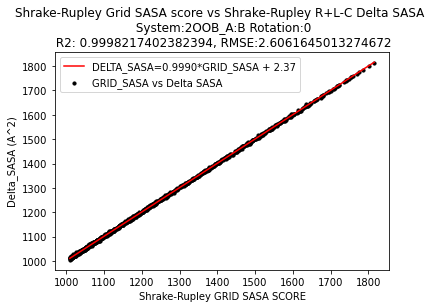

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
x = np.array(trans_scores)
y = np.array(delta_sasas)
C = np.array(colors)

x = x.reshape((-1,1))
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

pred_y = np.zeros(len(y), dtype=float)
for ind,point in enumerate(x):
    pred_y[ind] = point*model.coef_ + model.intercept_
MSE = mean_squared_error(y, pred_y)
RMSE = math.sqrt(MSE)

# scatter plot
fig, ax = plt.subplots()
# ax.scatter(x, y, 10, c=C, alpha=0.01, marker='o', cmap="hot",
#         label="GRID_SASA vs Delta SASA", edgecolors="black")
ax.scatter(x, y, 10, c="black", alpha=1, marker='o',
        label="GRID_SASA vs Delta SASA")
# regression plot
rx = np.linspace(x.min(), x.max(), 165)
ry = model.coef_*rx + model.intercept_

ax.plot(rx, ry, '-r', label=f'DELTA_SASA={float(model.coef_):.4f}*GRID_SASA + {float(model.intercept_):.2f}')
plt.xlabel("Shrake-Rupley GRID SASA SCORE")
plt.ylabel("Delta_SASA (A^2)")
ax.set_title(f'Shrake-Rupley Grid SASA score vs Shrake-Rupley R+L-C Delta SASA {chr(10)} System:{system} Rotation:{rot_num}{chr(10)} R2: {r_sq}, RMSE:{RMSE}')
ax.legend(loc='upper left')
# ax.colorbar()
plt.show()

In [ ]:
for u in range(len(translations)):
    print(score[translations[u]], delta_sasas[u])

In [12]:
com_grid.write_pdb('/home/jtufts/Desktop/test.pdb', "w")
com_grid.write_box('/home/jtufts/Desktop/testbox.pdb')

NATOM:2008


In [134]:
# print(cat_dictionaries(rec_grid._prmtop['POINTERS'], lig_grid._prmtop['POINTERS']))
print(com_grid._get_molecule_sasa(0.14, 960).sum())
print(lig_grid._get_molecule_sasa(0.14, 960).sum())
print(rec_grid._get_molecule_sasa(0.14, 960).sum())
print(rec_grid._get_molecule_sasa(0.14, 960).sum()+lig_grid._get_molecule_sasa(0.14, 960).sum())

7170.8086
3486.3755
4483.7715
7970.147


In [119]:
print(lig_grid._molecule_sasa.sum())

5823.7266


In [140]:
import pickle as p
f1 = np.load('/home/jtufts/Desktop/npy/delta_sasa_complex_minus_rl.npy')
f2 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/lig_sasa_sums.p', "rb"))
f3 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/rec_sasa_sums.p', "rb"))
f4 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/lig_sasas.p', "rb"))
f5 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/rec_sasas.p', "rb"))
f6 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/complex_sasas.p', "rb"))
# f4

In [138]:
k2 = list(f2.keys())
k2.sort()
print(k2[127],f2[k2[127]]*100+f3[k2[127]]*100)

2OOB_A:B 7970.235824584961


In [ ]:
lig_grid._move_ligand_to_lower_corner()
ls = lig_grid._get_molecule_sasa(0.14, 960)
rs = rec_grid._get_molecule_sasa(0.14, 960)

for m,val in enumerate(f4[k2[127]][0]):
    print(val,ls[0][m])

In [ ]:
for p,l in enumerate(delta_sasas):
    print(l, f1[127]*100)

In [165]:
(rec_disp - lig_grid._displacement)/0.5

masked_array(data=[68.0, 87.0, 45.0],
             mask=[False, False, False],
       fill_value=1e+20)

In [160]:
rec_disp

masked_array(data=[40.5, 56. , 27. ],
             mask=False,
       fill_value=1e+20)

In [166]:
score[68,87,45]

591.9999999999999

In [167]:
cfft[68,87,45]

(592.0000000000001+2.326614353372607e-13j)

In [48]:
def regplot(trans_scores, delta_sasas, colors, name):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import linregress
    from sklearn.linear_model import LinearRegression

    x = np.array(trans_scores)
    y = np.array(delta_sasas)
    C = np.array(colors, dtype=str)

    change = np.where(C == 'yellow')
    C[change] = "black"

    indicies = np.where(y < 1525)
    # indicies = np.where(y == 0)

    indicies = indicies[::-1]

    for i in indicies:
        x = np.delete(x, i)
        y = np.delete(y, i)
        C = np.delete(C, i)

    indicies = np.where(x == 0)
    indicies = indicies[::-1] 

    for i in indicies:
        x = np.delete(x, i)
        y = np.delete(y, i)
        C = np.delete(C, i)

    x = x.reshape((-1,1))

    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)

    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)


    # scatter plot
    fig, ax = plt.subplots()
    ax.scatter(x, y, 10, c=C, alpha=0.5, marker='+',
            label="SC SCORE vs Delta SASA")
    # regression plot
    rx = np.linspace(x.min(), x.max(), 165)
    ry = model.coef_*rx + model.intercept_

    ax.plot(rx, ry, '-r', label=f'DELTA_SASA={float(model.coef_):.4f}*SC_SCORE + {float(model.intercept_):.2f}')
    plt.xlabel("SC_score")
    plt.ylabel("Delta_SASA (nm^2)")
    ax.set_title(f'R2: {r_sq}')
    ax.legend(loc='upper left')
    plt.savefig(f'{name}')

In [ ]:
for i in range(9):
    # rx,ry,rz = np.random.randint(0, counts[0], 3)
    # rx = np.random.randint(19, 39, 1)
    # ry = np.random.randint(81, 101, 1)
    # rz = np.random.randint(74, 94, 1)
    rx = np.random.randint(26, 32, 1)
    ry = np.random.randint(113, 119, 1)
    rz = np.random.randint(49, 55, 1)
    lgrid_trans = grids.translate_grid(lgrid["SASA"], [rx,ry,rz])
    result = (lgrid_trans*rgrid).sum()
    print((rx,ry,rz), result, cfft[rx,ry,rz], (np.real(result)-np.imag(result)), score[rx,ry,rz])

In [ ]:
for i in range(len(colors)):
    print(i, colors[i])

In [ ]:
rec_grid._prmtop

In [49]:
sasa.sum()

162235.20273234017

In [50]:
lgrid["sasa"].sum()

125989.38912844221

Text(0, 0.5, 'Number of points')

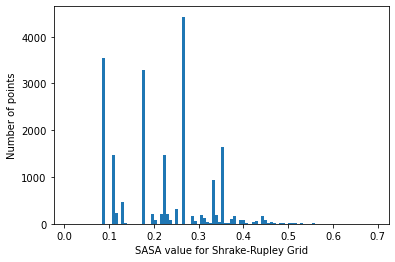

In [36]:
import matplotlib.pyplot as plt

plt.hist(r_grid.flatten(), bins=100, range=(.01, 0.69))
plt.xlabel("SASA value for Shrake-Rupley Grid")
plt.ylabel("Number of points")

In [18]:
a = np.array([1,2,3,4,5,6,7,8,9,10])
print(a)
a = a/5
a

[ 1  2  3  4  5  6  7  8  9 10]


array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [13]:
k = 0

for j in range(10):
    for i in list(range(10))[k:]:
        k = k + 10
        print(i)

0
1
2
3
4
5
6
7
8
9


In [7]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [40]:
lig_grid._crd.argmin()

2260

In [43]:
np.array([lig_grid._crd[:,i].argmin() for i in range(3)], dtype=int)

array([342, 753,   3])

In [57]:
np.array([lig_grid._crd[:,i].min() for i in range(3)], dtype=float)

array([42.17420387, 31.54957533, 60.36855125])

In [56]:
lig_grid._crd[753]

array([46.4203577 , 31.54957533, 76.50253725])

In [58]:
lig_grid._crd[3]

array([56.34309387, 68.54642868, 60.36855125])

In [63]:
edge_ind = np.array([lig_grid._crd[:,i].argmin() for i in range(3)], dtype=int)
edge_radii = np.array([lig_grid._prmtop["VDW_RADII"][i] for i in edge_ind], dtype=float)
print(edge_radii)

[1.2 1.2 1.2]


In [61]:
lig_grid._prmtop["VDW_RADII"][342]

1.2

In [40]:
lig_grid._displacement

masked_array(data=[-32.5, -42.5, -23. ],
             mask=False,
       fill_value=1e+20)

In [55]:
type(np.array(rec_disp-lig_grid._displacement*lig_grid._spacing))

numpy.ndarray

In [51]:
lig_grid._move_ligand_to_lower_corner()

Ligand translated by [0. 0. 0.]
[2.64105129 2.36711311 2.38056588]


In [52]:
lig_grid._displacement

masked_array(data=[0., 0., 0.],
             mask=False,
       fill_value=1e+20)

In [100]:
sasa.sum()

937691.0

In [17]:
good_grid = nc.Dataset("/media/jim/Research_TWO/FFT_PPI/2.redock/4.receptor_grid/2OOB_A:B/no_gaussian.nc")
good_sasa = np.array(good_grid.variables["sasa"])
error_grid = nc.Dataset("/media/jim/Research_TWO/FFT_PPI/2.redock/4.receptor_grid/2OOB_A:B/shrakerupley.nc")
error_sasa = np.array(error_grid.variables["sasa"])

In [18]:
error_sasa.sum()

937691.0

In [19]:
good_sasa.sum()

937691.0

In [21]:
diff = good_sasa - error_sasa

In [22]:
import matplotlib.pyplot as plt

0.0

(0.0, 10.0)

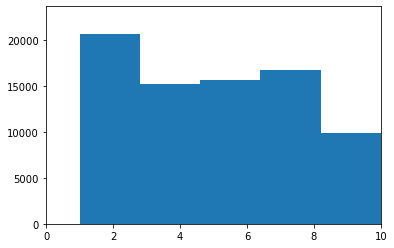

In [47]:
plt.hist(good_ones.flatten(), bins=10)
plt.xlim(0, 10)


(0.0, 10.0)

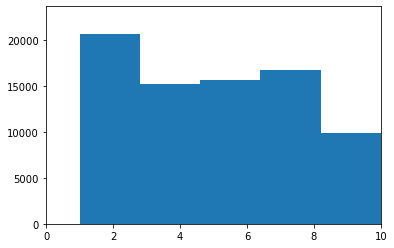

In [46]:
plt.hist(error_ones.flatten(), bins=10)
plt.xlim(0, 10)

In [40]:
good_ones = good_sasa[good_sasa>0]
error_ones = error_sasa[error_sasa>0]

In [41]:
good_ones

array([1., 1., 1., ..., 1., 1., 1.])

In [34]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [66]:
%%cython

import numpy as np
cimport numpy as np
from libc.math cimport sqrt

# Custom function to create a unique key for label pairs
def get_pair_key(label1, label2):
    return label1 < label2 and f"{label1}:{label2}" or f"{label2}:{label1}"

# Custom function to calculate distance
cdef double dist1(double[:] x, double[:] y):
    cdef double dist = 0.0
    cdef int i
    for i in range(x.shape[0]):
        dist += (x[i] - y[i]) * (x[i] - y[i])
    return sqrt(dist)

# Function to calculate distances
def calculate_distances(np.ndarray[double, ndim=2] array1, np.ndarray[double, ndim=2] array2, list array1_labels, list array2_labels, np.ndarray[double, ndim=1] r_sigmas, np.ndarray[double, ndim=1] l_sigmas):
    cdef:
        dict distances = {}
        dict indR = {}
        dict indL = {}
        dict sigmaR = {}
        dict sigmaL = {}
    cdef double current_distance
    cdef double previous_distance
    cdef int i, j
    cdef list rec_inds = []
    cdef list lig_inds = []
    cdef rec_natoms = array1.shape[0]
    cdef lig_natoms = array2.shape[0]
    
    for i in range(rec_natoms):
        if "H" not in array1_labels[i]:
            rec_inds.append(i)
    for i in range(lig_natoms):
        if "H" not in array2_labels[i]:
                lig_inds.append(i)
    
    for i in rec_inds:
        for j in lig_inds:
            current_distance = dist1(array1[i], array2[j])
            array1_label = array1_labels[i]
            array2_label = array2_labels[j]
            pair_key = get_pair_key(array1_label, array2_label)
            
            if pair_key not in distances:
                distances[pair_key] = current_distance
                indR[pair_key] = i
                indL[pair_key] = j
                sigmaR[pair_key] = r_sigmas[i]
                sigmaL[pair_key] = l_sigmas[j]
            elif current_distance < distances[pair_key]:
                distances[pair_key] = current_distance
                indR[pair_key] = i
                indL[pair_key] = j
                sigmaR[pair_key] = r_sigmas[i]
                sigmaL[pair_key] = l_sigmas[j]
    
    return {"sigmaR": sigmaR, "sigmaL": sigmaL, "dist": distances, "indR": indR, "indL": indL}

# Example data
array1 = np.array([[1.0, 2.0], [3.0, 4.0]])
array2 = np.array([[5.0, 6.0], [7.0, 8.0]])
array1_labels = ['label1', 'label2']
array2_labels = ['label2', 'label3']




In [ ]:
# Calculate distances
distances = calculate_distances(rec_grid._crd, lig_grid._crd, rec_grid._prmtop["PDB_TEMPLATE"]["ATOM_NAME"], lig_grid._prmtop["PDB_TEMPLATE"]["ATOM_NAME"], rec_grid._prmtop["LJ_SIGMA"], lig_grid._prmtop["LJ_SIGMA"])
print(distances)

In [86]:
rec_grid._prmtop["MASS"][4]

12.01

In [99]:
cab = []
for key,value in distances["dist"].items():
    if value < 10:
        string = f"{key}: "
        sigma_sum = 0
        for k,v in distances.items():
            string += f"{k}: {v[key]} "
            if "sigma" in k:
                sigma_sum += v[key]
        ab = distances["dist"][key]
        ba = (sigma_sum/2)
        # print(string+f"sigma_sum: {sigma_sum/2} aight fuck this: {ba-ab}")
        if ba-ab > 0.2:
            bac = ba-ab
            cab.append([key, bac])

print(cab)

            
    

[['N:O', 0.3587994765132314], ['N:OE2', 0.32662552678200374], ['OE1:OG', 0.3940730346087018], ['OE2:OG', 0.44572498510639447], ['CG:NZ', 0.2770968862707148], ['CD:ND1', 0.21030268792745144], ['NZ:OD1', 0.4782880621888981], ['ND2:OE1', 0.28682609747344845], ['CD:NZ', 0.30154710644048466], ['CD:CE3', 0.24528485610193984], ['OE1:OG1', 0.260791169286954], ['OE2:OG1', 0.35045242072267646], ['CE:OE1', 0.24618425373805097], ['NZ:OE1', 0.48142308799197187], ['NZ:OE2', 0.42265608245261044], ['NZ:OD2', 0.4297729346235388], ['MG:OG1', 0.6298695853471701], ['MG:OE1', 0.7164456445797169], ['MG:OXT', 0.739957007594529]]


In [38]:
sum(1 for value in distances.values() if value < 3)

27

In [76]:
def find_lowest_dist_values(data, count=100):
    def flatten_dict(d, parent_keys=()):
        for k, v in d.items():
            if isinstance(v, dict):
                yield from flatten_dict(v, parent_keys + (k,))
            else:
                yield parent_keys + (k,), v

    flat_data = list(flatten_dict(data))
    sorted_data = sorted(flat_data, key=lambda item: item[1])[:count]

    result = {}
    for keys, value in sorted_data:
        level_keys = []
        sub_dict = data
        for i, key in enumerate(keys):
            level_keys.append(key)
            sub_dict = sub_dict[key]
            if isinstance(sub_dict, dict) and "dist" in sub_dict:
                for dist_key, dist_value in sub_dict["dist"].items():
                    if dist_key not in result:
                        result[dist_key] = []
                    result[dist_key].append((dist_value, level_keys))

    return result



In [77]:
lowest_dist_values = find_lowest_dist_values(distances)

In [79]:
def flatten_dict(d, parent_keys=()):
        for k, v in d.items():
            if isinstance(v, dict):
                yield from flatten_dict(v, parent_keys + (k,))
            else:
                yield parent_keys + (k,), v

In [81]:
for i in flatten_dict(distances):
    print(i)

(('sigmaR', 'N:N'), 3.2499985240310356)
(('sigmaR', 'CA:N'), 3.2499985240310356)
(('sigmaR', 'C:N'), 3.2499985240310356)
(('sigmaR', 'N:O'), 3.2499985240310356)
(('sigmaR', 'CB:N'), 3.3996695084507405)
(('sigmaR', 'N:OG'), 3.066473387458142)
(('sigmaR', 'CG2:N'), 3.3996695084507405)
(('sigmaR', 'N:OG1'), 3.2499985240310356)
(('sigmaR', 'CG:N'), 3.2499985240310356)
(('sigmaR', 'CD:N'), 3.2499985240310356)
(('sigmaR', 'CE:N'), 3.2499985240310356)
(('sigmaR', 'N:NZ'), 3.2499985240310356)
(('sigmaR', 'N:OD1'), 2.959921901644687)
(('sigmaR', 'N:ND2'), 3.2499985240310356)
(('sigmaR', 'N:OE1'), 3.2499985240310356)
(('sigmaR', 'N:OE2'), 3.2499985240310356)
(('sigmaR', 'CG1:N'), 3.2499985240310356)
(('sigmaR', 'CD1:N'), 3.2499985240310356)
(('sigmaR', 'CD2:N'), 3.2499985240310356)
(('sigmaR', 'N:NE2'), 3.2499985240310356)
(('sigmaR', 'N:OD2'), 2.959921901644687)
(('sigmaR', 'CE1:N'), 3.399669507944831)
(('sigmaR', 'CZ:N'), 3.399669507944831)
(('sigmaR', 'CE2:N'), 3.399669507944831)
(('sigmaR', 